# SVM

In [1]:
import pandas as pd
path="C:\\Users\\Sriram\\Downloads\\Data\\Data\\Social_Network_Ads.csv"
data=pd.read_csv(path)
print(data)
print(data.info())

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-nu

In [2]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le_gender=LabelEncoder()
data['Gender_n']=le_gender.fit_transform(data['Gender'])
inputs=data.drop(['User ID','Purchased','Gender'],'columns')
output=data.drop(['Gender_n','User ID','Gender','Age','EstimatedSalary'],'columns')
print(inputs)
print(output)

     Age  EstimatedSalary  Gender_n
0     19            19000         1
1     35            20000         1
2     26            43000         0
3     27            57000         0
4     19            76000         1
..   ...              ...       ...
395   46            41000         0
396   51            23000         1
397   50            20000         0
398   36            33000         1
399   49            36000         0

[400 rows x 3 columns]
     Purchased
0            0
1            0
2            0
3            0
4            0
..         ...
395          1
396          1
397          1
398          0
399          1

[400 rows x 1 columns]


C:\Users\Sriram\AppData\Local\Temp\ipykernel_13084\1591336712.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  inputs=data.drop(['User ID','Purchased','Gender'],'columns')
C:\Users\Sriram\AppData\Local\Temp\ipykernel_13084\1591336712.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  output=data.drop(['Gender_n','User ID','Gender','Age','EstimatedSalary'],'columns')


In [3]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,output,test_size=0.2)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     Age  EstimatedSalary  Gender_n
49    31            89000         0
231   39            42000         1
20    45            22000         1
99    28            37000         0
155   31            15000         0
..   ...              ...       ...
58    22            18000         1
266   40            75000         1
244   41            72000         0
325   41            60000         0
91    30           116000         0

[320 rows x 3 columns]
     Age  EstimatedSalary  Gender_n
184   33            60000         0
45    23            20000         1
301   48            74000         1
6     27            84000         0
359   42            54000         1
..   ...              ...       ...
31    27           137000         0
275   57            74000         1
47    27            54000         0
392   45            45000         0
291   49            89000         1

[80 rows x 3 columns]
     Purchased
49           0
231          0
20           1
99           0
155          0

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
print(y_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)
import numpy as np
newinputs=np.array([[23,63000,1]])
newinputs=sc.transform(newinputs)
result=model.predict(newinputs)
print(result[0])

[0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 0 1]
     Purchased
184          0
45           0
301          1
6            0
359          0
..         ...
31           1
275          1
47           0
392          1
291          1

[80 rows x 1 columns]
[[42  2]
 [ 5 31]]
0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Random forest

In [5]:
import pandas as pd
path="C:\\Users\\Sriram\\Downloads\\digit\\digit.csv"
data=pd.read_csv(path)
print(data)
print(data.info())

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [6]:
inputs=data.drop('label','columns')
print(inputs.shape)
output=data['label']
print(output.shape)

(42000, 784)
(42000,)


C:\Users\Sriram\AppData\Local\Temp\ipykernel_13084\2803182392.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  inputs=data.drop('label','columns')


In [7]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,output,test_size=0.2)
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=300) #no of decision trees
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)


[1 6 7 ... 7 0 1]


In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[821   0   0   0   1   1   3   0   0   0]
 [  0 904   4   2   0   1   1   0   1   1]
 [  6   3 806   3   4   0   4   6   5   1]
 [  2   0   8 852   1   9   1   4   5   3]
 [  0   2   1   0 793   0   6   1   2  16]
 [  2   0   0  11   5 703   6   1   7   3]
 [  5   0   1   0   3   4 839   0   2   0]
 [  0   8  12   1   5   0   0 854   3   9]
 [  0   2   3  10   4   5   2   0 766  12]
 [  2   0   1   9  13   0   2   9   7 785]]


In [9]:
from sklearn.metrics import accuracy_score
print("accuracy score :",accuracy_score(y_test,y_pred)*100,"%")

accuracy score : 96.70238095238095 %


predicted:6


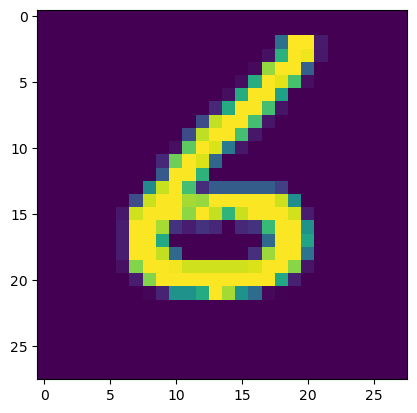

In [10]:
import matplotlib.pyplot as plt
index=23
print("predicted:"+str(model.predict(x_test)[index]))
plt.imshow(x_test.iloc[index].values.reshape((28,28)))